## Caracterização meteorológica da área de estudo

Autora: Kezia Bernarda de Oliveira

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## 1. Analise da condição Meteorológica de superfície

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR.


In [51]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Kezia\Documents\GitHub\ENS7173_202401
C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie
['metar_2022.csv', 'metar_2023.csv']


In [52]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    if file == 'metar_2023.csv':
        metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie).reset_index()

print(metSuperficie)

      index  day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0         0    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1         1    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2         2    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3         3    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4         4    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...     ...  ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.6

In [53]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


index  day  month  year  hour  ct     wd        ws  \
datetime                                                                  
2023-01-01 00:00:00      0    1      1  2023     0 NaN  360.0  5.144440   
2023-01-01 01:00:00      1    1      1  2023     1 NaN  360.0  4.115552   
2023-01-01 02:00:00      2    1      1  2023     2 NaN  360.0  4.115552   
2023-01-01 03:00:00      3    1      1  2023     3 NaN  350.0  4.629996   
2023-01-01 04:00:00      4    1      1  2023     4 NaN  340.0  5.144440   
...                    ...  ...    ...   ...   ...  ..    ...       ...   
2023-12-31 19:00:00   8753   31     12  2023    19 NaN  110.0  4.629996   
2023-12-31 20:00:00   8754   31     12  2023    20 NaN  130.0  3.601108   
2023-12-31 21:00:00   8755   31     12  2023    21 NaN  120.0  2.057776   
2023-12-31 22:00:00   8756   31     12  2023    22 NaN  190.0  2.057776   
2023-12-31 23:00:00   8757   31     12  2023    23 NaN  140.0  2.057776   

                         hc  ccp  cco            p  temp  dpTemp  vis   pw  \
datetime                                                                     
2023-01-01 00:00:00  2133.6  3.0  3.0  1009.658428  25.0    22.0  NaN  0.0   
2023-01-01 01:00:00  3048.0  6.0  6.0  1009.654835  25.0    22.0  NaN  0.0   
2023-01-01 02:00:00  3048.0  6.0  6.0  1009.654835  25.0    22.0  NaN  0.0   
2023-01-01 03:00:00  3048.0  6.0  6.0  1009.654835  25.0    22.0  NaN  0.0   
2023-01-01 04:00:00  1219.2  6.0  6.0  1009.658428  25.0    22.0  NaN  0.0   
...                     ...  ...  ...          ...   ...     ...  ...  ...   
2023-12-31 19:00:00  2438.4  6.0  6.0  1009.651241  25.0    18.0  NaN  0.0   
2023-12-31 20:00:00  2438.4  6.0  6.0  1009.651241  24.0    18.0  NaN  0.0   
2023-12-31 21:00:00  2438.4  6.0  6.0  1009.654835  24.0    18.0  NaN  0.0   
2023-12-31 22:00:00  2438.4  6.0  6.0  1009.654835  23.0    19.0  NaN  0.0   
2023-12-31 23:00:00  2438.4  6.0  6.0  1009.651241  23.0    18.0  NaN  0.0   

                      relh            datetime  
datetime                                        
2023-01-01 00:00:00  83.44 2023-01-01 00:00:00  
2023-01-01 01:00:00  83.44 2023-01-01 01:00:00  
2023-01-01 02:00:00  83.44 2023-01-01 02:00:00  
2023-01-01 03:00:00  83.44 2023-01-01 03:00:00  
2023-01-01 04:00:00  83.44 2023-01-01 04:00:00  
...                    ...                 ...  
2023-12-31 19:00:00  65.12 2023-12-31 19:00:00  
2023-12-31 20:00:00  69.14 2023-12-31 20:00:00  
2023-12-31 21:00:00  69.14 2023-12-31 21:00:00  
2023-12-31 22:00:00  78.19 2023-12-31 22:00:00  
2023-12-31 23:00:00  73.44 2023-12-31 23:00:00  

[8758 rows x 18 columns]

In [54]:
# Criando função de formatar eixo y

def formatareixoy():
    formatter = ScalarFormatter(useOffset=False)  # Criar um ScalarFormatter para evitar offsets como 1.009e3
    formatter.set_scientific(False)  # Desativar notação científica
    return(formatter)

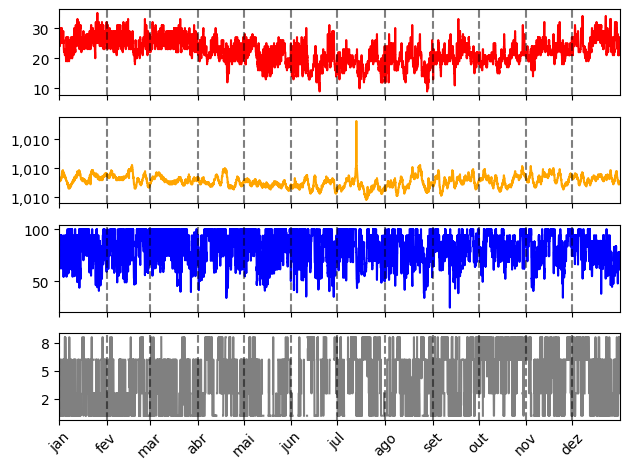

In [55]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import locale

# Configurando o locale para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

# Definindo as colunas a serem plotadas
lista_colunas = ['temp', 'p', 'relh', 'cco']

# Defina as cores para cada coluna
lista_cores = ['red', 'orange', 'blue', 'gray']

fig, ax = plt.subplots(4, sharex=True)

# Plotando os dados para cada coluna
for ii in range(4):
    ax[ii].plot(metSuperficie['datetime'], metSuperficie[lista_colunas[ii]], color=lista_cores[ii])
    ax[ii].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

    # Adicionando linha para cada mês
    for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
        ax[ii].axvline(x=date, color='black', linestyle='--', alpha=0.5)
    
    ax[ii].tick_params(axis='x', rotation=45)
    ax[ii].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Aplicar o formatter ao eixo y

# Configurando o formato do eixo x para mostrar os meses abreviados
ax[3].xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

plt.tight_layout()
plt.show()

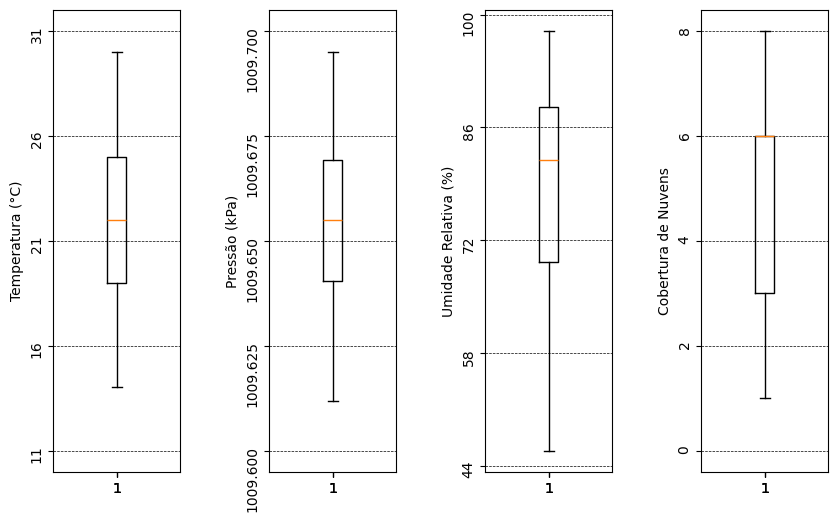

In [56]:
# Fazendo boxplot das variáveis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Carregando os dados do arquivo CSV
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Definindo as colunas que você deseja plotar
lista_colunas = ['temp', 'p', 'relh', 'cco']

# Criando uma figura e eixos
fig, ax = plt.subplots(1, 4, sharex=True, figsize=(10, 6))

# Removendo valores acima do percentil 95°
temp99 = np.percentile(metSuperficie['temp'], 99)
temp01 = np.percentile(metSuperficie['temp'], 1)
pres99 = np.percentile(metSuperficie['p'], 99)
pres01 = np.percentile(metSuperficie['p'], 1)
umid99 = np.percentile(metSuperficie['relh'], 99)
umid01 = np.percentile(metSuperficie['relh'], 1)
cco100 = 8.001
cco00 = 0.999

lista_percentis = [temp99, temp01, pres99, pres01, umid99, umid01, cco100, cco00]
lista_eixoy = ['Temperatura (°C)', 'Pressão (kPa)', 'Umidade Relativa (%)', 'Cobertura de Nuvens']

# Definindo a função para formatar o eixo y
def formatareixoy():
    formatter = ticker.ScalarFormatter(useOffset=False)  # Criar um ScalarFormatter para evitar offsets como 1.009e3
    formatter.set_scientific(False)  # Desativar notação científica
    return formatter

for ii in range(4):
    ax[ii].boxplot(metSuperficie[lista_colunas[ii]].dropna()[(metSuperficie[lista_colunas[ii]] < lista_percentis[ii*2]) 
                                                     & (metSuperficie[lista_colunas[ii]] > lista_percentis[ii*2+1])])

    maximo = round(lista_percentis[ii*2], 1)  # Valor máximo da variável arredondado em uma casa decimal      
    minimo = round(lista_percentis[ii*2+1], 1)  # Valor mínimo da variável arredondado em uma casa decimal
    eixo_y = []
    
    for a in range(0, 5):
        b = 0
        while b == 0:
            if (maximo - minimo) % 4 == 0 or (maximo - minimo) < 1:
                ax[ii].axhline(a*(maximo - minimo)/4 + minimo, color='black', linestyle='--', linewidth=0.5)
                eixo_y.append(a*(maximo - minimo)/4 + minimo)
                b = 1
            else:
                minimo = int(minimo) - 1

    ax[ii].yaxis.set_major_formatter(formatareixoy())  # Aplicar o formatter ao eixo y
    
    ax[ii].set_yticks(eixo_y)
    
    for tick in ax[ii].get_yticklabels():
        tick.set_rotation(90)

    ax[ii].set_ylabel(lista_eixoy[ii])
        
# Criando espaçamento entre os subgráficos
plt.subplots_adjust(wspace=0.7)

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Verificar se o diretório de saída existe, caso contrário, criar
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar as figuras
fig_path = os.path.join(output_dir, 'boxplots_meteorologicos.png')
plt.savefig(fig_path)

# Exibir os boxplots
plt.show()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\Kezia\AppData\Local\Temp\ipykernel_5616\1478889480.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_5616\1478889480.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_5616\1478889480.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_5616\1478889480.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_5616\1478889480.py:30: FutureWarning: 'M' is deprecated and will be removed in a future ve

<Figure size 800x600 with 0 Axes>

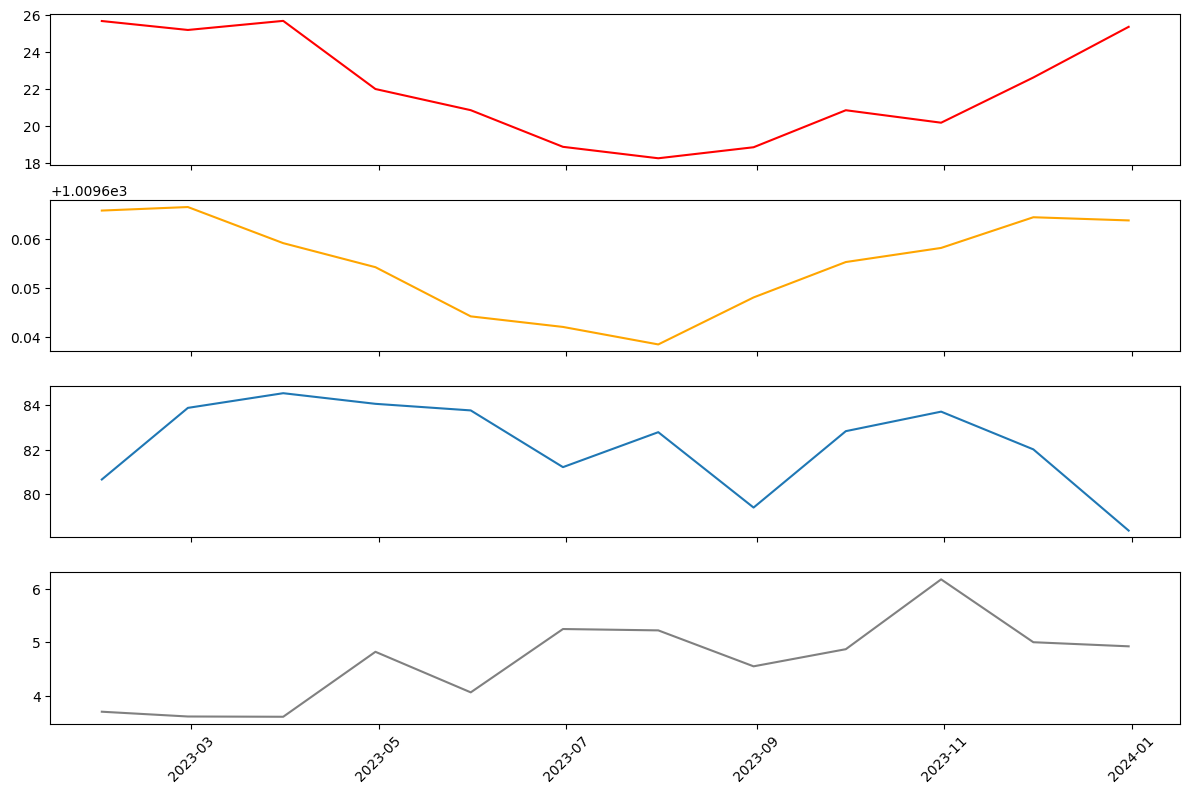

            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

In [57]:
# Estatísticas dos dados

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Converter a data e hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir o índice como datetime
metSuperficie.set_index('datetime', inplace=True)

# Verificar o tipo de índice
print(type(metSuperficie.index))

# Calcular estatísticas mensais
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Criar uma figura e eixos
plt.figure(figsize=(8, 6))

#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True, figsize=(12, 8))
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Criar o DataFrame estatisticas
estatisticas = pd.DataFrame({'coluna1': [1, 2, 3], 'coluna2': [4, 5, 6]})

# Salvar a figura
plt.savefig('media_mensal.png')

# Mostrar a figura
plt.show()

# Verificar as estatísticas mínimas mensais
print(min_mensal)

([<matplotlib.axis.XTick at 0x260a3b7bf50>,
 [Text(1, 0, 'jan'),
  Text(2, 0, 'fev'),
  Text(3, 0, 'mar'),
  Text(4, 0, 'abr'),
  Text(5, 0, 'mai'),
  Text(6, 0, 'jun'),
  Text(7, 0, 'jul'),
  Text(8, 0, 'ago'),
  Text(9, 0, 'set'),
  Text(10, 0, 'out'),
  Text(11, 0, 'nov'),
  Text(12, 0, 'dez')])

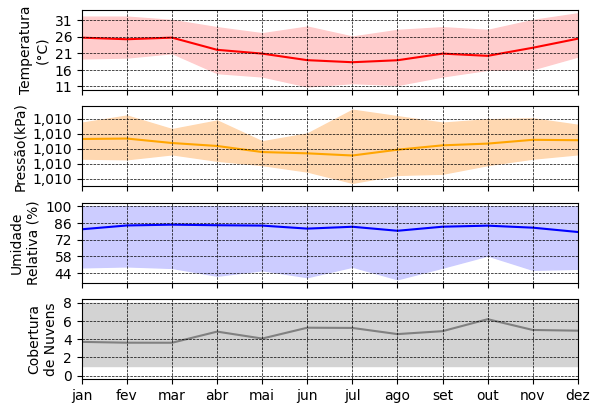

In [58]:
# Estatísticas dos dados

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Calcular estatísticas mensais
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.groupby('month').mean()
min_mensal = metSuperficie.groupby('month').quantile(0.01)
max_mensal = metSuperficie.groupby('month').quantile(0.99)

#print(media_mensal)

# Defina as colunas que você deseja plotar
lista_colunas = ['temp', 'p', 'relh', 'cco']

# Defina as cores para cada coluna
lista_cores = ['red', 'orange', 'blue', 'gray']

# Defina as cores para as sombras
lista_cores_sombra = ['#FFCCCC', '#FFD8B1', '#CCCCFF', '#D3D3D3']

# Defina os rótulos para o eixo y
lista_eixoy2 = ['Temperatura\n(°C)', 'Pressão(kPa)', 'Umidade\nRelativa (%)', 'Cobertura\nde Nuvens']

# Plotando figura com os dados para cada coluna
fig,ax = plt.subplots(4,sharex=True)

for ii in range(4):
    ax[ii].plot(media_mensal.index, media_mensal[lista_colunas[ii]], color=lista_cores[ii])
    ax[ii].fill_between(media_mensal.index, min_mensal[lista_colunas[ii]], max_mensal[lista_colunas[ii]], color=lista_cores_sombra[ii])

    for a in range(1, 13):
        ax[ii].axvline(x=a, color='black', linestyle='--', linewidth=0.5)
        
    ax[ii].set_xlim(1, 12)

    maximo = round(metSuperficie[lista_colunas[ii]].quantile(0.99), 1)  # Valor máximo da variável arredondado em uma casa decimal      
    minimo = round(metSuperficie[lista_colunas[ii]].quantile(0.01), 1)  # Valor mínimo da variável arredondado em uma casa decimal  
    
    eixo_y = []
    
    for a in range(0, 5):
        b = 0
        while b == 0:
            if (maximo - minimo) % 4 == 0 or (maximo - minimo) < 1:
                ax[ii].axhline(a*(maximo - minimo)/4 + minimo, color='black', linestyle='--', linewidth=0.5)
                eixo_y.append(a*(maximo - minimo)/4 + minimo)
                b = 1
            else:
                minimo = int(minimo) - 1
    
    ax[ii].set_yticks(eixo_y)

    # Desativando a notação científica e configurando o uso de ScalarFormatter para mais controle
    ax[ii].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Aplicar o formatter ao eixo y

    ax[ii].set_ylabel(lista_eixoy2[ii])

# Configurando as etiquetas do eixo x para serem os meses
plt.xticks(range(1, 13), ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])

<Figure size 1000x1000 with 0 Axes>

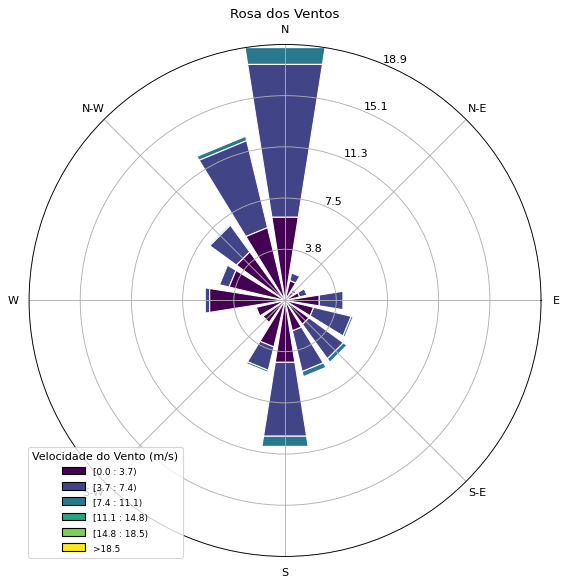

In [59]:
# Criando minha rosa dos ventos

from windrose import WindroseAxes
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Converter a data e hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir o índice como datetime
metSuperficie.set_index('datetime', inplace=True)

# Verificar se as colunas de direção do vento (wd) e velocidade do vento (ws) estão presentes
if 'wd' not in metSuperficie.columns or 'ws' not in metSuperficie.columns:
    raise ValueError("O DataFrame deve conter colunas 'wd' (direção do vento) e 'ws' (velocidade do vento).")

# Criar a rosa dos ventos
fig = plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor='white')

# Adicionar a legenda
ax.set_legend(title="Velocidade do Vento (m/s)")
plt.title('Rosa dos Ventos')

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

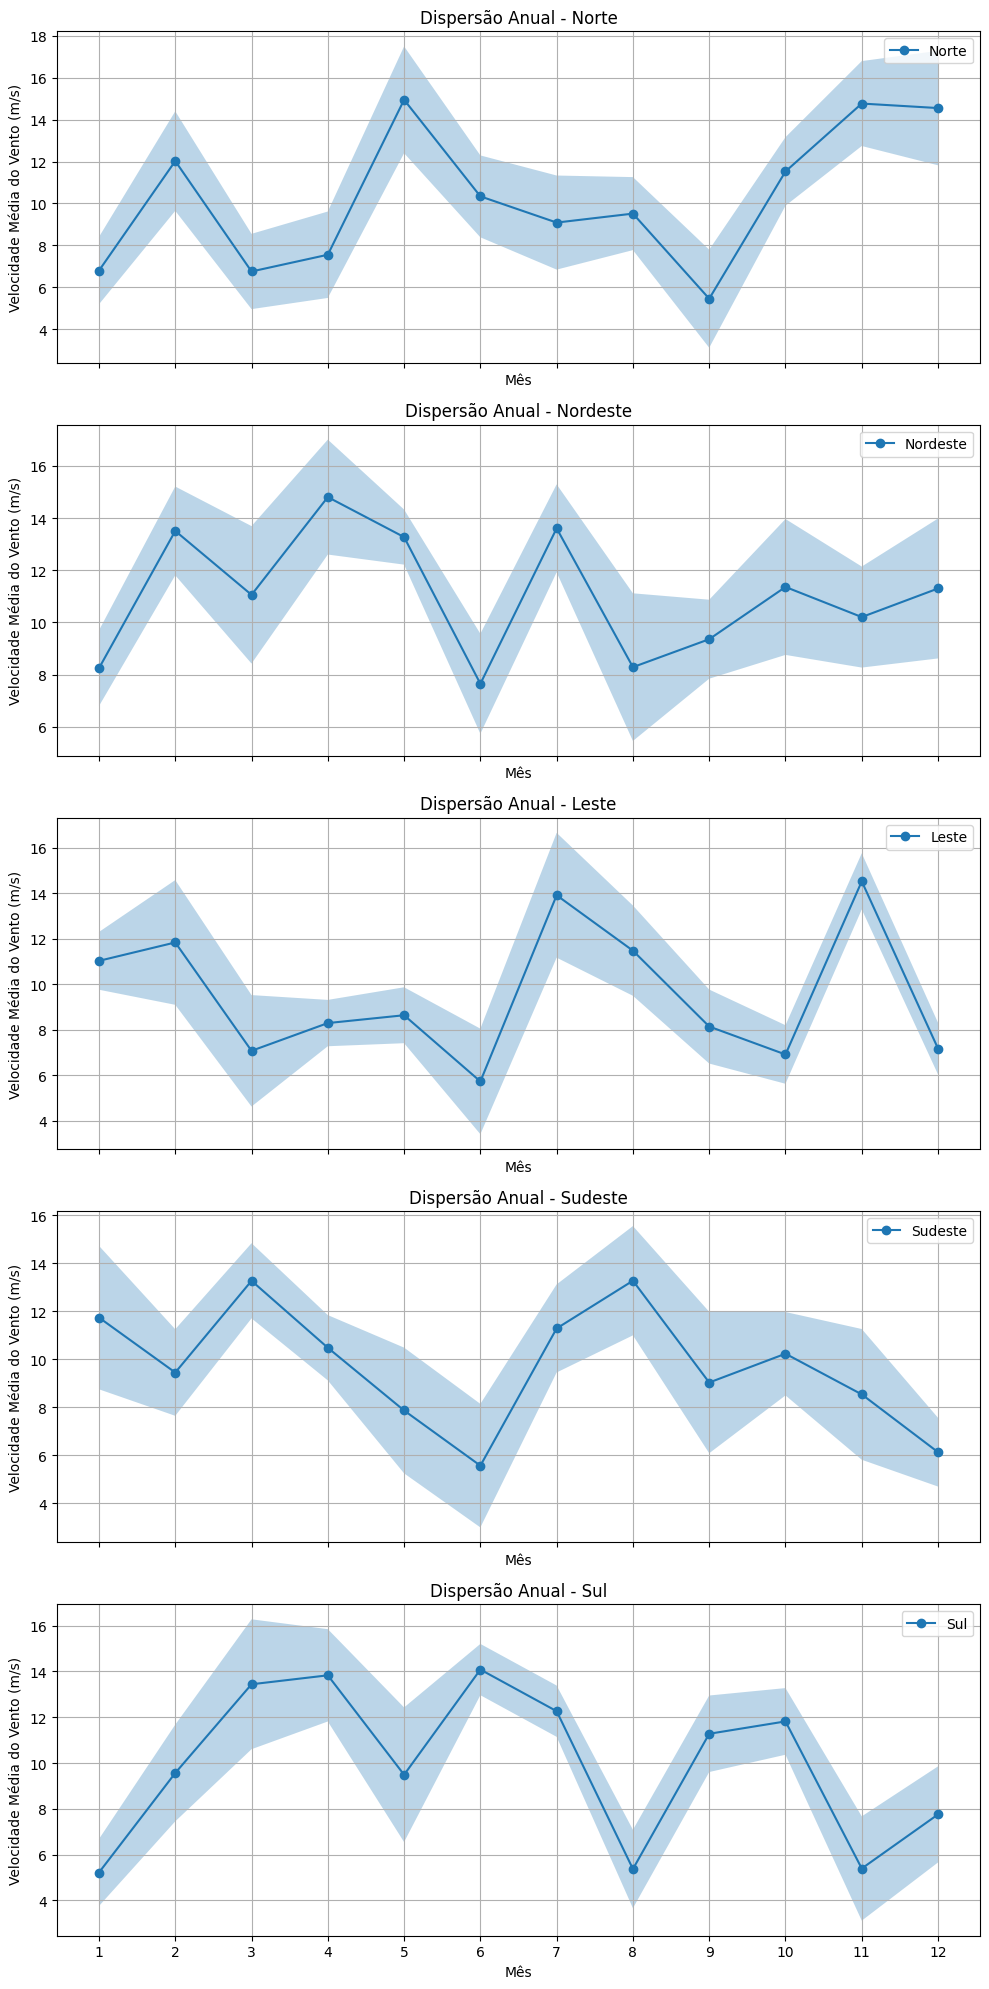

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados aleatórios para ilustrar a análise
quadrantes = ['Norte', 'Nordeste', 'Leste', 'Sudeste', 'Sul']
meses = range(1, 13)

# Criar DataFrame para armazenar os dados
dados = {
    'Quadrante': [],
    'Mês': [],
    'Velocidade Média': [],
    'Desvio Padrão': []
}

for quad in quadrantes:
    for mes in meses:
        # Gerar velocidade média aleatória para o quadrante e mês específicos
        velocidade_media = np.random.uniform(5, 15)
        # Gerar desvio padrão aleatório para o quadrante e mês específicos
        desvio_padrao = np.random.uniform(1, 3)
        dados['Quadrante'].append(quad)
        dados['Mês'].append(mes)
        dados['Velocidade Média'].append(velocidade_media)
        dados['Desvio Padrão'].append(desvio_padrao)

df = pd.DataFrame(dados)

# Plotar dispersões anuais para cada quadrante com fill_between
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, quad in enumerate(quadrantes):
    df_quad = df[df['Quadrante'] == quad]
    meses = df_quad['Mês']
    velocidade_media = df_quad['Velocidade Média']
    desvio_padrao = df_quad['Desvio Padrão']
    
    # Plotar dispersões anuais
    axes[i].plot(meses, velocidade_media, '-o', label=quad)
    axes[i].fill_between(meses, velocidade_media - desvio_padrao, velocidade_media + desvio_padrao, alpha=0.3)
    axes[i].set_title(f'Dispersão Anual - {quad}')
    axes[i].set_xlabel('Mês')
    axes[i].set_ylabel('Velocidade Média do Vento (m/s)')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

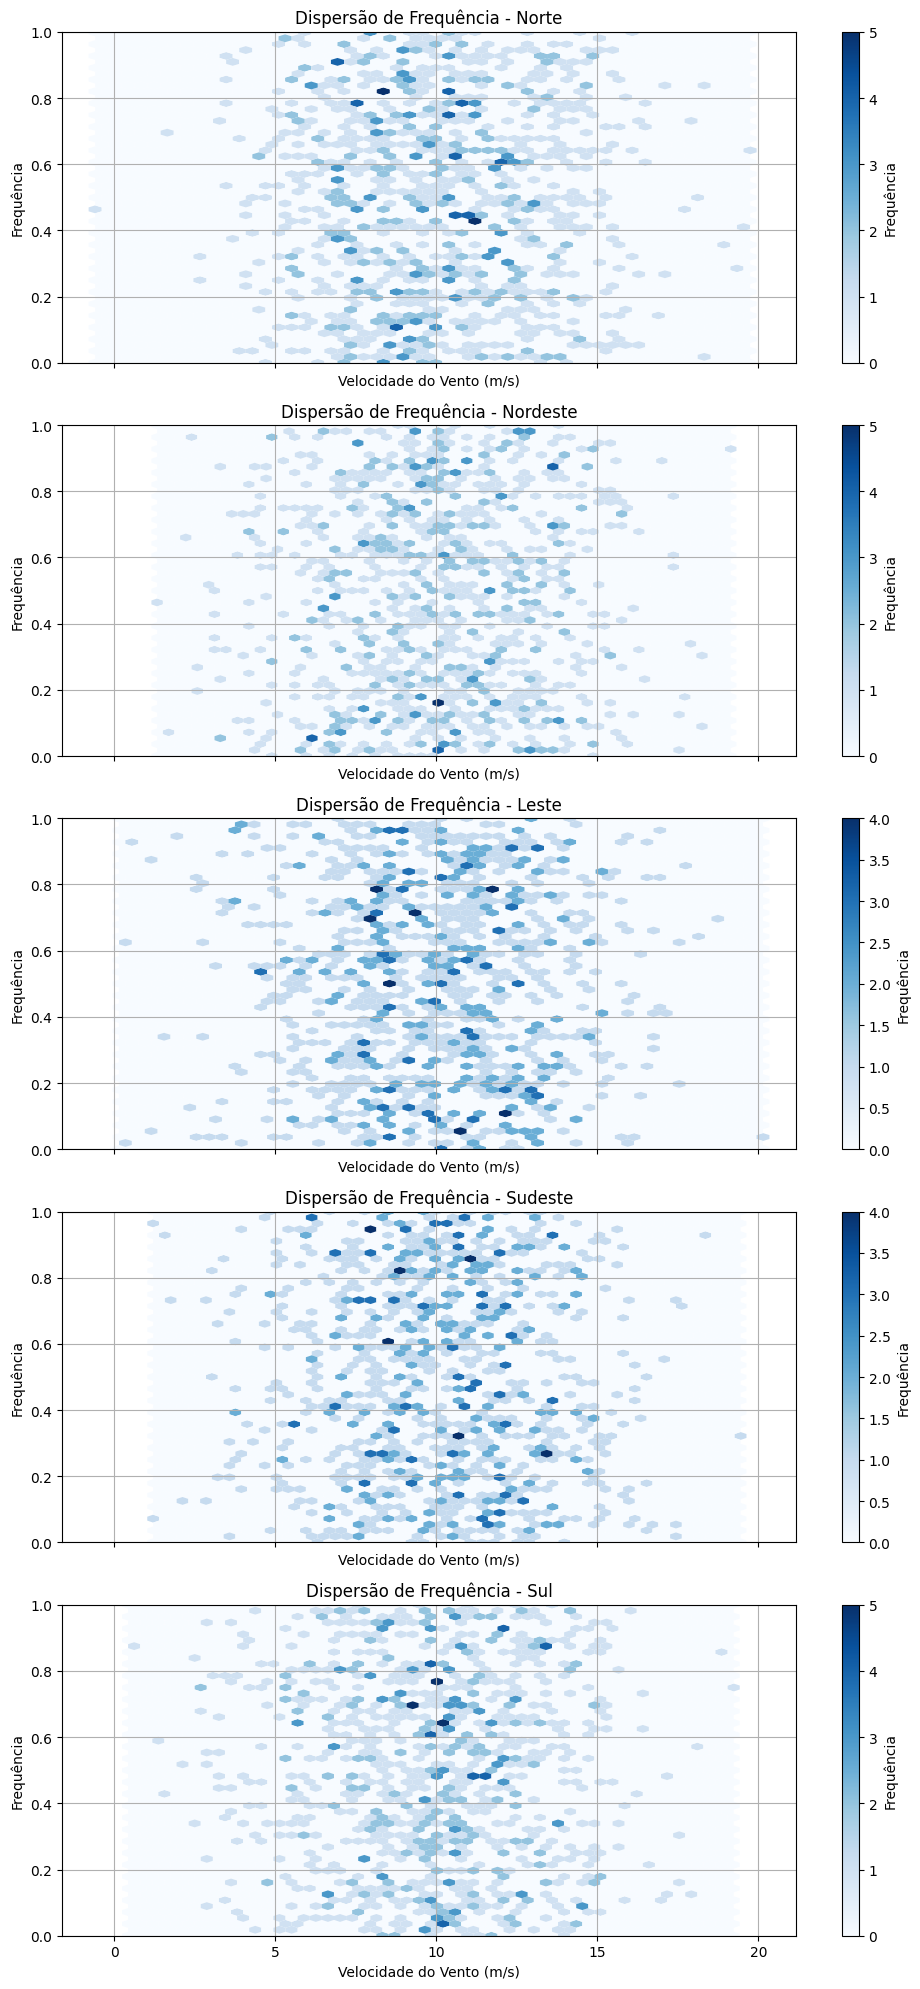

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados fictícios
quadrantes = ['Norte', 'Nordeste', 'Leste', 'Sudeste', 'Sul']
velocidades = np.random.normal(10, 3, size=(1000, len(quadrantes)))

# Criar DataFrame
df = pd.DataFrame(velocidades, columns=quadrantes)

# Plotar hexbin plot para cada quadrante
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, quad in enumerate(quadrantes):
    # Plotar hexbin plot
    hb = axes[i].hexbin(df[quad], np.random.rand(len(df)), gridsize=50, cmap='Blues', edgecolors='none')
    axes[i].set_title(f'Dispersão de Frequência - {quad}')
    axes[i].set_xlabel('Velocidade do Vento (m/s)')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True)
    axes[i].set_ylim(0, 1)  # Limitar o eixo y entre 0 e 1
    
    # Adicionar barra de cores
    cb = fig.colorbar(hb, ax=axes[i])
    cb.set_label('Frequência')

plt.tight_layout()
plt.show()

## Análise upperair/sondagem/perfil da atmosfera

Nesta parte analisou-se os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o pacote Siphon do Python. Analise os dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

In [68]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

import random
from datetime import datetime, timedelta

# Definindo as datas de início e fim do verão e do inverno no Brasil
verao_inicio = datetime(2022, 12, 21)
verao_final = datetime(2023, 3, 20)
inverno_inicio = datetime(2023, 6, 21)
inverno_final = datetime(2023, 9, 22)
dias_verao = verao_final - verao_inicio
dias_inverno = inverno_final - inverno_inicio
lista_verao = []
lista_inverno = []

for a in range (5): # Selecionando 5 dias aleatórios para cada estação
    dia_aleatorio_verao = random.randint(0, dias_verao.days)
    dia_aleatorio_inverno = random.randint(0, dias_inverno.days)
    for b in range(2): # Selecionando meia noite e meio dia
        data_verao = verao_inicio + timedelta(days = dia_aleatorio_verao,hours=b*12)
        data_inverno = inverno_inicio + timedelta(days = dia_aleatorio_inverno, hours=b*12)
        if data_verao.year == 2022: # Transformar 2022 para 2023
            data_verao = data_verao + timedelta(days = 365)
        lista_verao.append(data_verao)
        lista_inverno.append(data_inverno)

# local da análise
station = 'SBFL'

dicionario_verao = {} # Criando dicionário para armazenar os dataframes do verão
dicionario_inverno = {} # Criando dicionário para armazenar os dataframes do inverno

for i in range(10): # Adicionando os dataframes de verao e inverno a cada dicionario
    df_verao = WyomingUpperAir.request_data(lista_verao[i],station)
    df_inverno = WyomingUpperAir.request_data(lista_inverno[i],station)
    dicionario_verao[str(lista_verao[i])] = df_verao
    dicionario_inverno[str(lista_inverno[i])] = df_inverno

# Imprimir os dicionarios
print(dicionario_verao)
print(dicionario_inverno)

# Obtendo uma lista das chaves do dicionário
datas_verao = list(dicionario_verao.keys())
datas_inverno = list(dicionario_inverno.keys())

{'2023-03-07 00:00:00':     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1008.0      5.0         24.2      22.6         40      2  -1.285575   
1     1002.0     56.0         24.4      22.0         44      7  -4.862609   
2     1000.0     73.0         24.4      21.8         45      8  -5.656854   
3      985.0    206.0         24.2      20.0         33     12  -6.535668   
4      970.0    340.0         23.1      19.4         20     17  -5.814342   
..       ...      ...          ...       ...        ...    ...        ...   
89      42.0  21767.0        -60.4     -92.9        115     18 -16.313540   
90      39.3  22177.0        -58.1     -93.1        105     24 -23.182220   
91      37.0  22556.0        -58.3     -93.3         95     30 -29.885841   
92      32.2  23429.0        -58.9     -93.9        100     36 -35.453079   
93      32.0      NaN          NaN       NaN        100     36 -35.453079   

       v_wind station  station_number       time  l

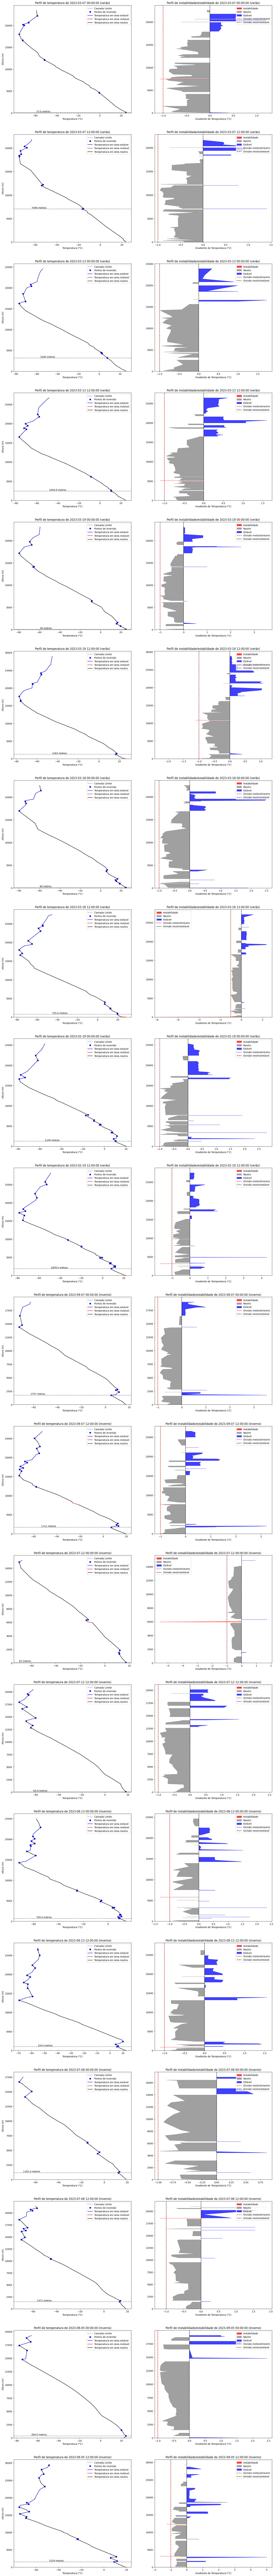

In [72]:
# Fazendo figura do perfil de temperatura

fig,ax = plt.subplots(20,2,figsize=(20, 200))

lista_datas = datas_verao+datas_inverno
lista_camadas = []

for ii in range(20):
    
    if ii <10:
        dic = dicionario_verao[str(lista_datas[ii])]
        ax[ii,0].set_title('Perfil de temperatura de ' + str(lista_datas[ii]) + ' (verão)')
        ax[ii,1].set_title('Perfil de instabilidade/estabilidade de ' + str(lista_datas[ii]) + ' (verão)')
    else:
        dic = dicionario_inverno[str(lista_datas[ii])]
        ax[ii,0].set_title('Perfil de temperatura de ' + str(lista_datas[ii]) + ' (inverno)')
        ax[ii,1].set_title('Perfil de instabilidade/estabilidade de ' + str(lista_datas[ii]) + ' (inverno)')
    
    # Calcular gradiente de temperatura
    deltaT = np.diff(dic['temperature'])
    deltaZ = np.diff(dic['height'])
    
    dTdZ = 100*(deltaT/deltaZ) # A cada 100 m

    camada_limite = -999

    for a in range(len(dTdZ)):
        if dTdZ[a] < -1: # Instável
            color = 'red'
        elif dTdZ[a] >= 0: # Estável
            color = 'blue'
            #ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, color='blue', alpha=0.2, label='Instabilidade')
        else: # Neutra
            color = 'black'
            #ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, color='black', alpha=0.2, label='Instabilidade')
        
        ax[ii,0].plot(dic['temperature'][a:a+2],dic['height'][a:a+2], color = color)

        # Verificar inversão e adiciona bolinha
        if a < len(dTdZ)-1:
            if (dTdZ[a] < 0 and dTdZ[a+1] >= 0) or (dTdZ[a] >= 0 and dTdZ[a+1] < 0):
                ax[ii, 0].plot(dic['temperature'][a+1], dic['height'][a+1], 'o', color='blue')      
                if camada_limite == -999:
                    camada_limite = dic['height'][a+1]
                    lista_camadas.append(camada_limite)

    # Adicionando camada limite
    ax[ii,0].axhline(y=camada_limite, color='gray', linestyle='--', label='Camada Limite')
    ax[ii,0].text(dic['temperature'][a], camada_limite + 100, f'{camada_limite} metros', color='black', fontsize=10)
    
    ax[ii,0].set_ylabel('Altura (m)')
    ax[ii,0].set_xlabel('Temperatura (°C)')
    ax[ii,1].set_xlabel('Gradiente de Temperatura (°C)')
    
    # Criando perfil de análise de instabilidade/neutralidade/estabilidade

    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = (dTdZ < -1), color='red', alpha=0.75, label='Instabilidade')
    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = ((dTdZ >= -1) & (dTdZ < 0)), color='gray', alpha=0.75, label='Neutro')
    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = (dTdZ >= 0), color='blue', alpha=0.75, label='Estável')

    ax[ii,1].axvline(x=-1, color='red', linestyle='--', label='Divisão instável/neutro') # Divisão instável/neutro
    ax[ii,1].axvline(x=0, color='black', linestyle='--', label='Divisão neutro/estável') # Divisão instável/neutro

    # Estabelecendo 0 como ponto de início do eixo y
    ax[ii,0].set_ylim(bottom=0) 
    ax[ii,1].set_ylim(bottom=0)


# Adicionando uma legenda
 #Criando falso label de temperatura e de ponto de inversão para adicionar na legenda
    ax[ii, 0].plot(-1, -200, 'o', color='blue',label='Pontos de inversão') 
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'blue', label = 'Temperatura em área estável')
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'red', label = 'Temperatura em área instável')
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'black', label = 'Temperatura em área neutra')
    
    ax[ii,0].legend()
    ax[ii,1].legend()
    
# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures'


In [75]:
# Avaliação das camadas limites entre meia noite e meio dia, e entre verão e inverno

lista_datas2 = []
lista_camada_madrugada = []
lista_camada_meiodia = []

for i in range(10):
    data = datetime.strptime(lista_datas[i*2], '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')    
    data = str(data)
    lista_datas2.append(data)
    lista_camada_madrugada.append(lista_camadas[i*2])
    lista_camada_meiodia.append(lista_camadas[i*2+1])

lista_camada_madrugada_verao = []
lista_camada_madrugada_inverno = []
lista_camada_meiodia_verao = []
lista_camada_meiodia_inverno = []
lista_datas_verao = []
lista_datas_inverno = []

for i in range(10):
    if i < 5:
        lista_datas_verao.append(lista_datas2[i])
        lista_camada_madrugada_verao.append(lista_camada_madrugada[i])
        lista_camada_meiodia_verao.append(lista_camada_meiodia[i])
    else:
        lista_datas_inverno.append(lista_datas2[i])
        lista_camada_madrugada_inverno.append(lista_camada_madrugada[i])
        lista_camada_meiodia_inverno.append(lista_camada_meiodia[i])


     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

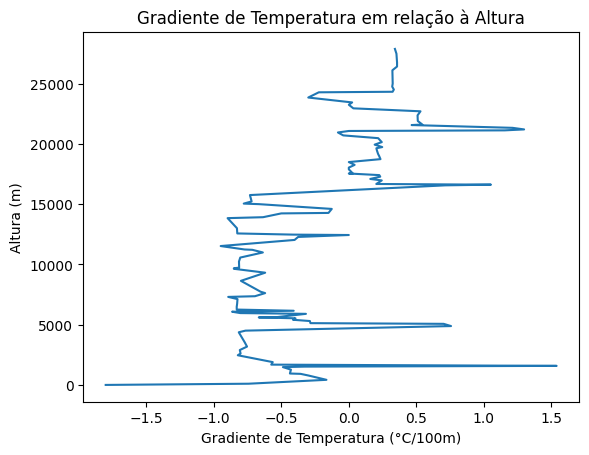

In [14]:
# Calcular gradiente de temperatura x altura

import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# Local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

# Plot do gradiente de temperatura em relação à altura
deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

# Adicionar a legenda
ax.set_xlabel('Gradiente de Temperatura (°C/100m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Gradiente de Temperatura em relação à Altura')

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

## 2.  Análise do perfil de temperatura

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica.

Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


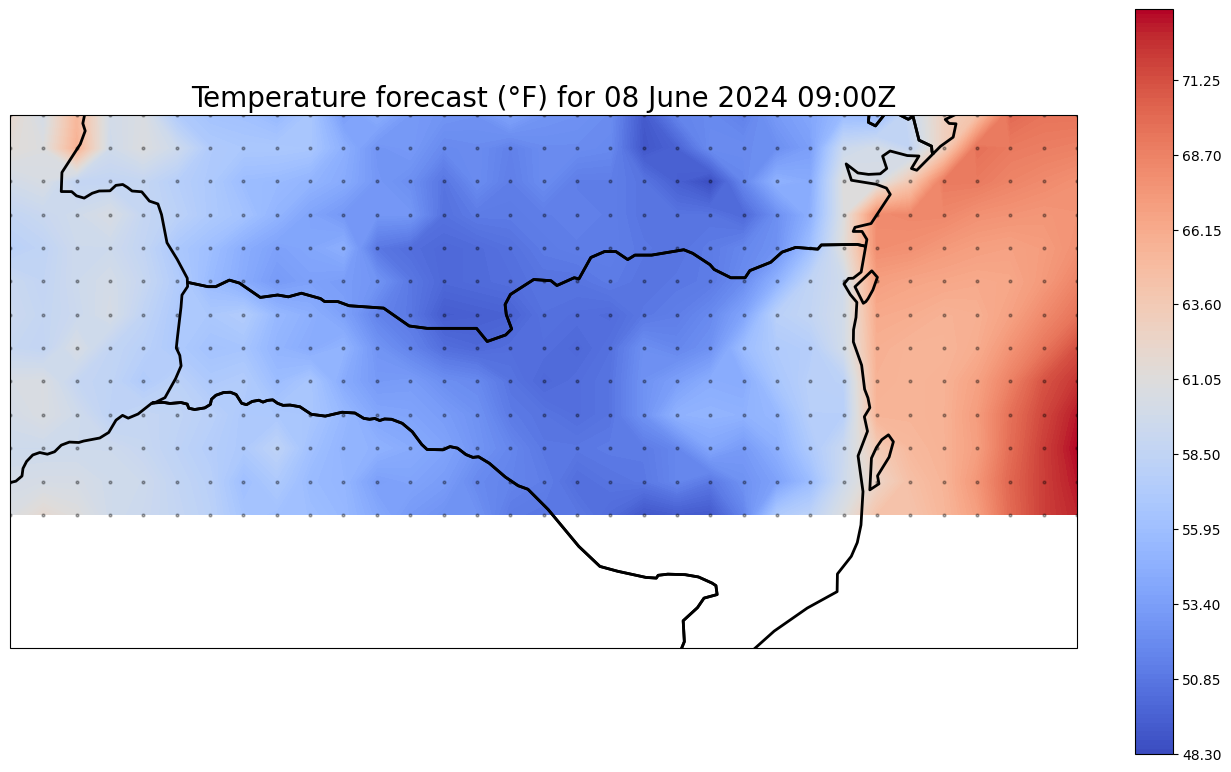

In [14]:
#Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python

from datetime import datetime

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
from siphon.catalog import TDSCatalog


from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -29, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

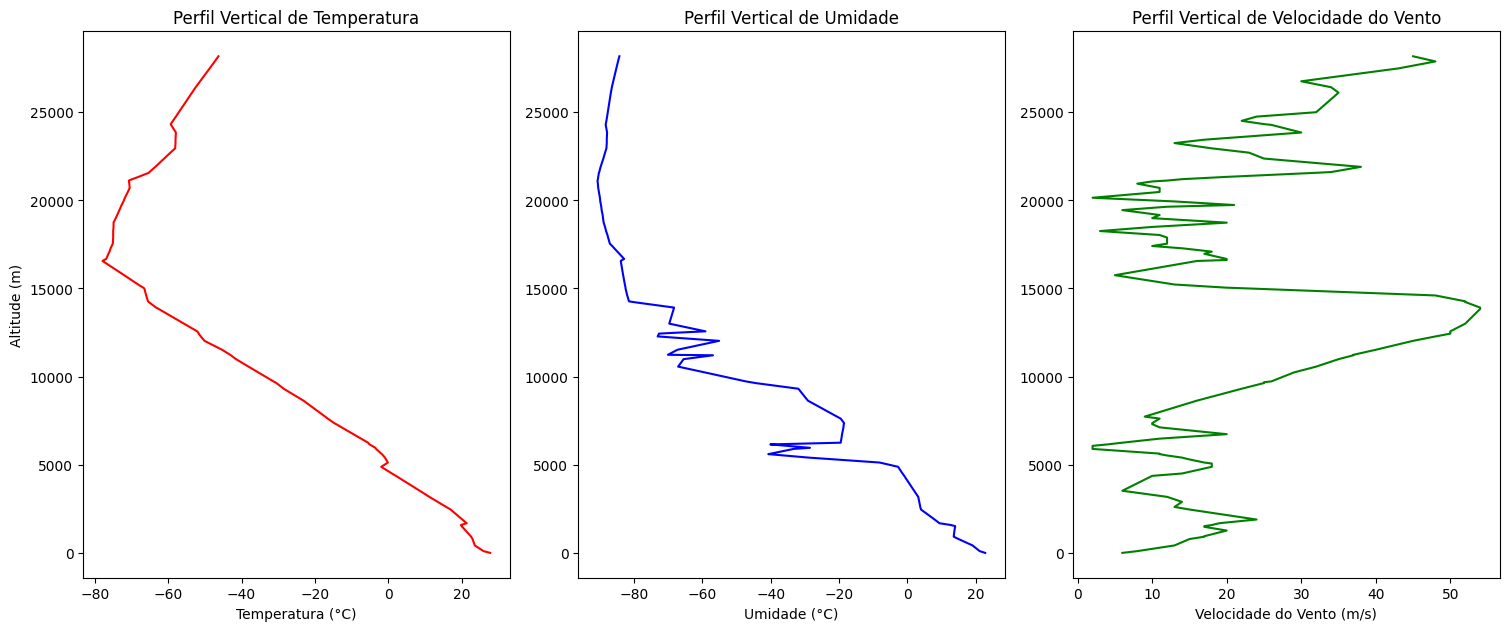

In [19]:
# Construção de Perfis Verticais de Temperatura, Umidade e Vento na Atmosfera (MeteoSondagem):

import os

# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Criando o perfil vertical
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].plot(df['temperature'], df['height'], color='red')
axs[1].plot(df['dewpoint'], df['height'], color='blue')
axs[2].plot(df['speed'], df['height'], color='green')

plt.tight_layout()


# Adicionar a legenda
axs[0].set_xlabel('Temperatura (°C)')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_title('Perfil Vertical de Temperatura')

axs[1].set_xlabel('Umidade (°C)')
axs[1].set_title('Perfil Vertical de Umidade')

axs[2].set_xlabel('Velocidade do Vento (m/s)')
axs[2].set_title('Perfil Vertical de Velocidade do Vento')


# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

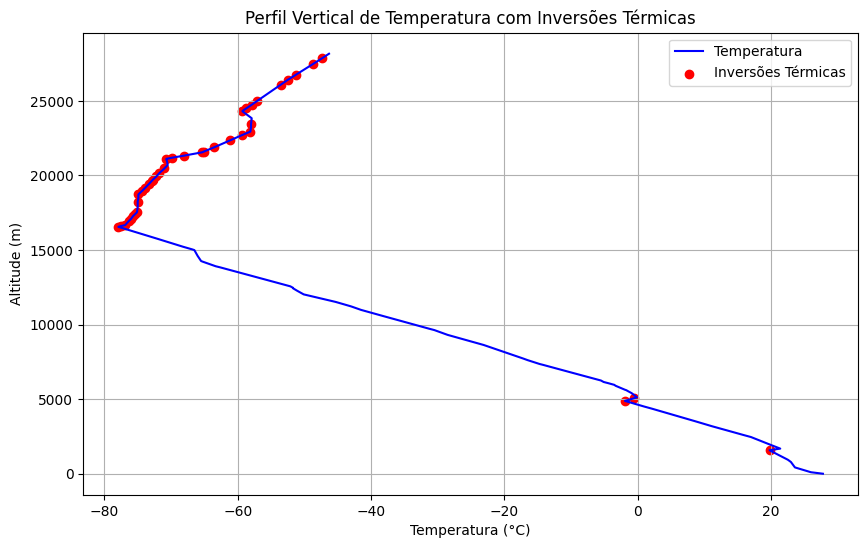

In [11]:
from datetime import datetime
import pandas as pd
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt


# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Calcular gradientes de temperatura
delta_T = np.diff(df['temperature'])
delta_Z = np.diff(df['height'])

# Ajustar o comprimento dos gradientes de temperatura
delta_T_adjusted = delta_T
delta_Z_adjusted = delta_Z

# Verificar se os gradientes de temperatura e altitude têm o mesmo comprimento
if len(delta_T_adjusted) != len(delta_Z_adjusted):
    min_length = min(len(delta_T_adjusted), len(delta_Z_adjusted))
    delta_T_adjusted = delta_T_adjusted[:min_length]
    delta_Z_adjusted = delta_Z_adjusted[:min_length]

# Calcular o gradiente de temperatura vertical (dT/dZ)
dTdZ = (delta_T_adjusted / delta_Z_adjusted) * 100  # em graus Celsius por 100 metros

# Identificar inversões térmicas (onde dT/dZ > 0)
inversoes_termicas = df.iloc[:-1][dTdZ > 0]

# Plotar perfil de temperatura e marcar inversões térmicas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['temperature'], df['height'], label='Temperatura', color='blue')
ax.scatter(inversoes_termicas['temperature'], inversoes_termicas['height'], color='red', marker='o', label='Inversões Térmicas')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Altitude (m)')
ax.set_title('Perfil Vertical de Temperatura com Inversões Térmicas')
ax.legend()
plt.grid(True)

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02\\perfil_temperatura_inversoes_termicas.png'


plt.show()

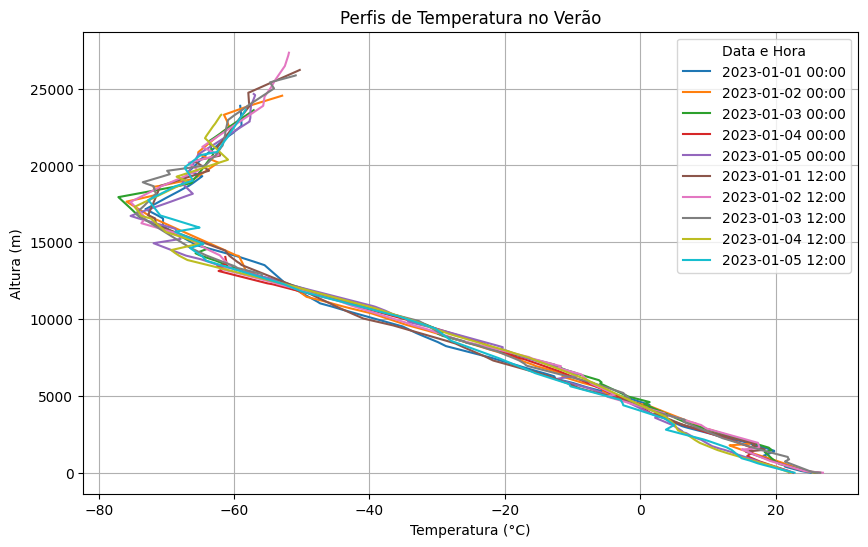

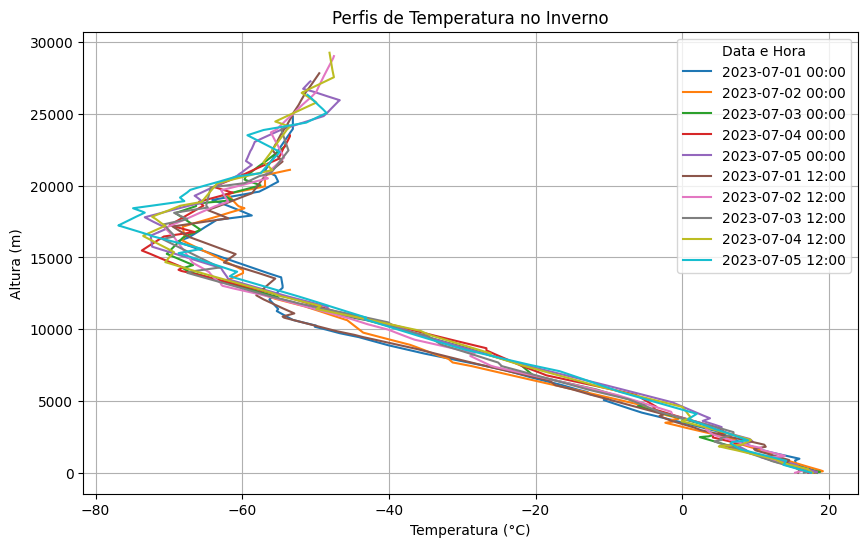

In [14]:
## Análise do Perfil de Temperatura: 
Plot dos perfis de temperatura para cada período (verão e inverno).

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para obter dados de sondagem
def get_sounding_data(dates, station):
    data = []
    for date in dates:
        df = WyomingUpperAir.request_data(date, station)
        data.append(df)
    return data

# Definindo os períodos de verão e inverno
summer_dates = [datetime(2023, 1, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 1, 1, 12) + timedelta(days=i) for i in range(5)]
winter_dates = [datetime(2023, 7, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 7, 1, 12) + timedelta(days=i) for i in range(5)]

station = 'SBFL'

# Coletando dados de verão
summer_data = get_sounding_data(summer_dates, station)

# Coletando dados de inverno
winter_data = get_sounding_data(winter_dates, station)

# Função para plotar perfis de temperatura
def plot_temperature_profiles(data, dates, title):
    plt.figure(figsize=(10, 6))
    for df, date in zip(data, dates):
        plt.plot(df['temperature'], df['height'], label=date.strftime('%Y-%m-%d %H:%M'))
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend(title='Data e Hora', loc='upper right')
    plt.grid(True)
    plt.show()

# Plotando os perfis de temperatura para o verão
plot_temperature_profiles(summer_data, summer_dates, 'Perfis de Temperatura no Verão')

# Plotando os perfis de temperatura para o inverno
plot_temperature_profiles(winter_data, winter_dates, 'Perfis de Temperatura no Inverno')


## EZ-AERMET

Execute o EZ-AERMET e avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar. Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

Text(0.5, 0, 'Data de 2023 (horas)')

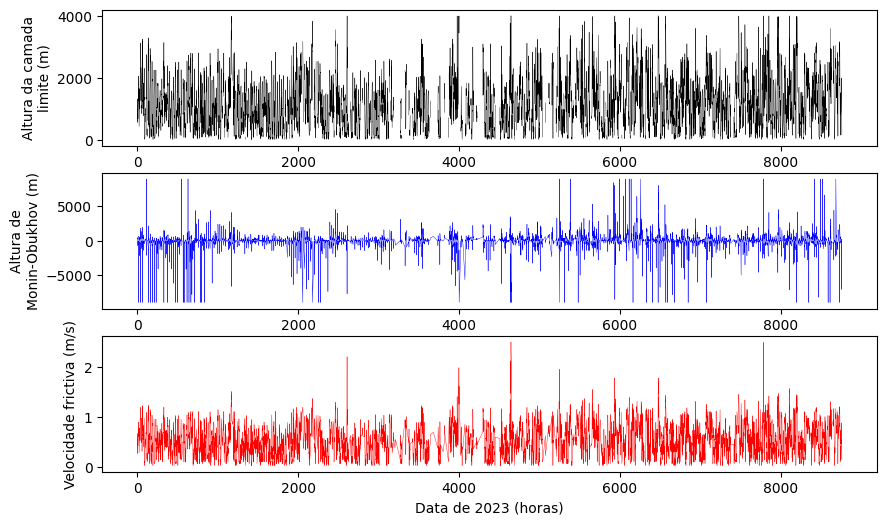

In [77]:
caminho= rootPath+'\\dados\\EZ_AERMOD_keziabernarda_2024-05-24'

df_ezaermet = pd.read_csv(caminho+'\\METEO.csv')

# Renomeando as colunas
df_ezaermet.columns = [
    "ano", "mes", "dia", "dia juliano", "hora", "calor sensível",
    "surface friction velocity", "convective velocity scale",
    "potential temperature", "convectively-driven mixing height",
    "mechanically-driven mixing height", "Monin-Obukhov length",
    "rugosidade", "bowen", "albedo", "velocidade de vento",
    "direcao de vento", "anenometro", "temperatura",
    "medida de medida da temperatura", "codigo de precipitacao",
    "quantidade de precipitacao", "umidade relativa", "pressao (mb)",
    "cobertura de nuvens", "velocidade vento", "cobertura de nuvem"
]

#print(df_ezaermet)

# Função auxiliar para encontrar o maior valor, ignorando valores negativos
def maior_valor(row):
    val1 = row["convectively-driven mixing height"]
    val2 = row["mechanically-driven mixing height"]
    # Filtra valores negativos
    valores = [val for val in [val1, val2] if val >= 0]
    if valores:
        return max(valores)
    else:
        return None  # ou algum valor padrão como NaN

# Aplicando a função a cada linha do DataFrame
lista_camadalimite = df_ezaermet.apply(maior_valor, axis=1).tolist()
#print(lista_camadalimite)

# Criando figura com o valor da camada limite bruta

fig, ax = plt.subplots(3,1,figsize=(10,6))

ax[0].plot(lista_camadalimite,linewidth=0.3, color='black')
ax[0].set_ylabel('Altura da camada\nlimite (m)')
ax[0].set_xlabel('Data de 2023 (horas)')

# Criando figura com o valor da altura de Monin-Obukhov

ax[1].plot(df_ezaermet[df_ezaermet['Monin-Obukhov length'] != -99999]['Monin-Obukhov length'],linewidth=0.3, color='blue')
ax[1].set_ylabel('Altura de\nMonin-Obukhov (m)')
ax[1].set_xlabel('Data de 2023 (horas)')

# Criando figura de velocidade frictiva

ax[2].plot(df_ezaermet[df_ezaermet['surface friction velocity'] != -9]['surface friction velocity'],linewidth=0.3, color='red')
ax[2].set_ylabel('Velocidade frictiva (m/s)')
ax[2].set_xlabel('Data de 2023 (horas)')

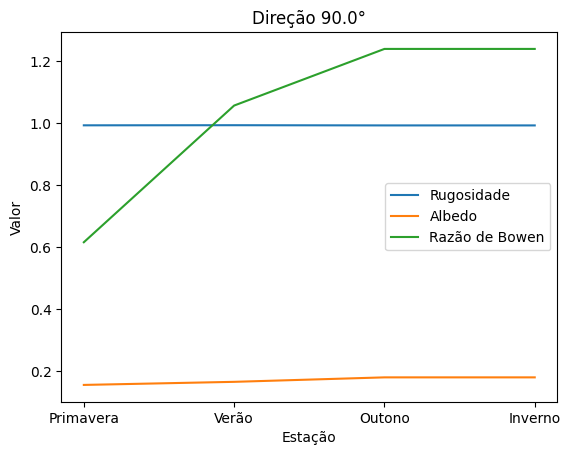

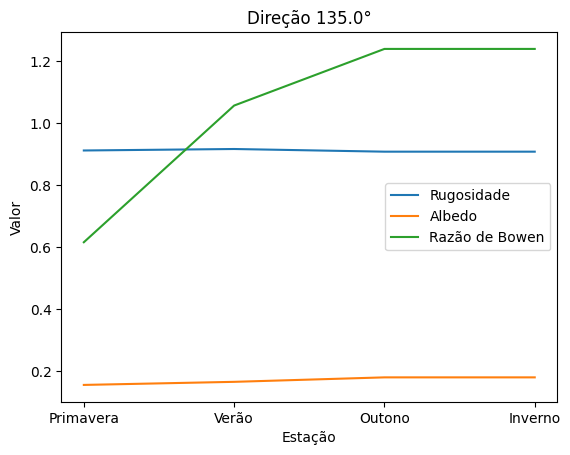

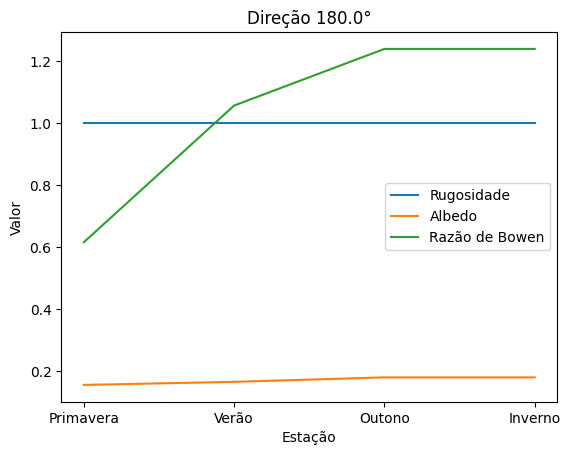

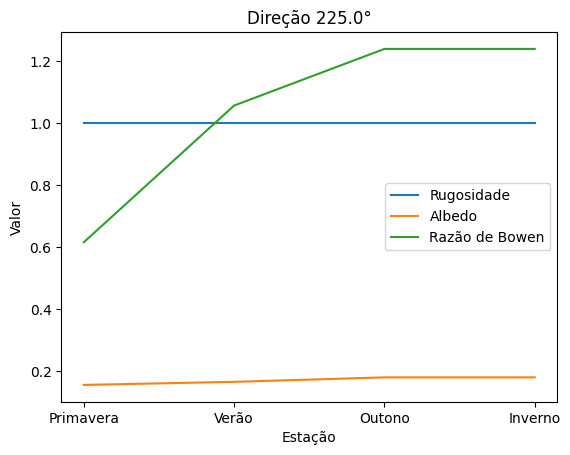

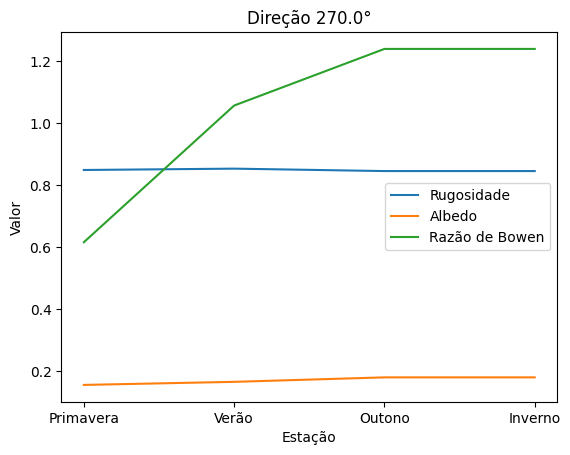

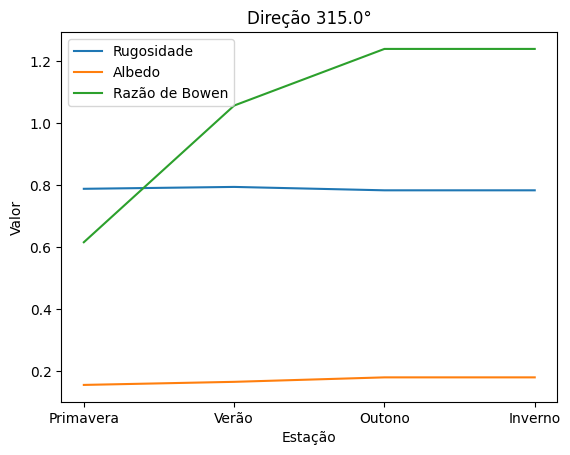

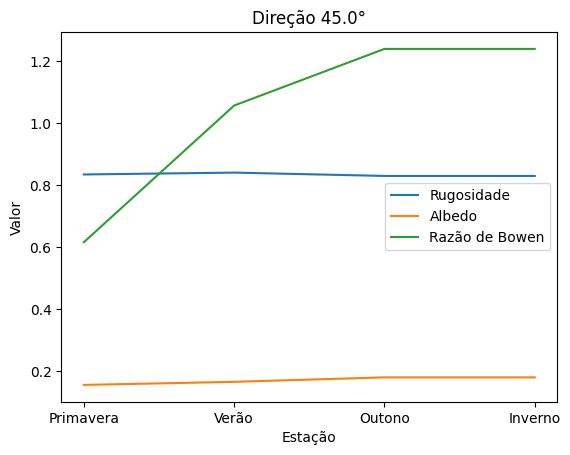

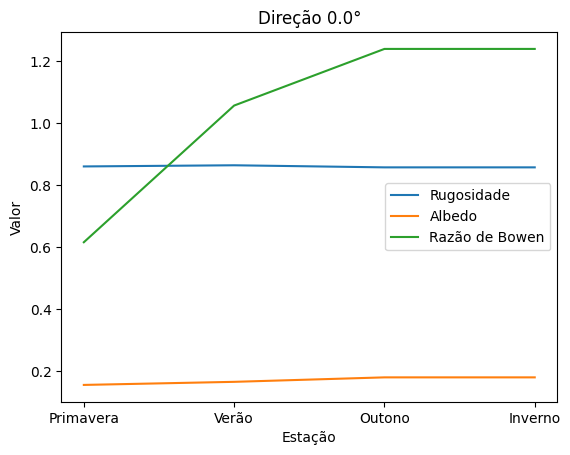

In [78]:
# Análise bowen, rugosidade e albedo para cada quadrante

df_quadrantes = pd.read_csv(caminho+'\\landUseCharSANTACATARINA.csv')

# Iterando sobre as linhas do DataFrame
for index, row in df_quadrantes.iterrows():
    # Criando uma nova figura para cada linha
    plt.figure()
    
    # Plotando os valores de z0, alb e bo para a linha atual
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['z0_spring'], row['z0_summer'], row['z0_autumn'], row['z0_winter']], label='Rugosidade')
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['alb_spring'], row['alb_summer'], row['alb_autumn'], row['alb_winter']], label='Albedo')
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['bo_spring'], row['bo_summer'], row['bo_autumn'], row['bo_winter']], label='Razão de Bowen')
    
    # Adicionando título e legendas
    plt.title('Direção ' + str(row['Sectors']) + '°')
    plt.xlabel('Estação')
    plt.ylabel('Valor')
    plt.legend()
    
    # Exibindo 

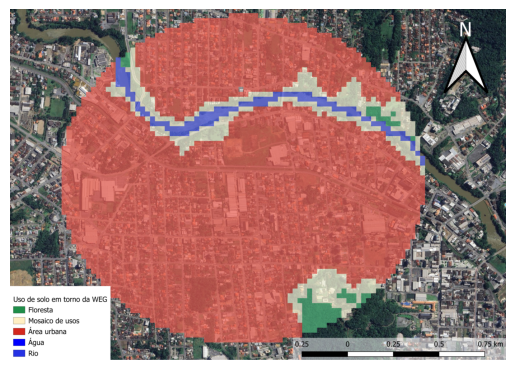

In [83]:
# Apresentando imagem de satélite

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar a imagem
img = mpimg.imread('C:\\Users\\Kezia\\Documents\\GitHub\\ENS7173_202401\\figures\\WEG.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  

# Desativar os eixos
plt.show()